### Hypothesis
- 소득 수준이 비슷한 사람들은 비슷한 지역에 거주하며 군집을 이룰 것이다.
- 소득 수준이 높은 지역의 소매업과 요식업의 bill단가는 소득 수준이 낮은 지역에 비해 더 높을 것이다.

In [3]:
# jeju_financial_life_data.csv
data = pd.read_csv("../../01_jeju/codes/datas/jeju_financial_life_data.csv")
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 50)

In [22]:
# job_points 컬럼 추가: 직업군별 가중치
job_df = data[['job_majorc','job_smallc','job_public','job_profession','job_self','job_none','job_other']]
# job_points = [100, 68, 92, 100, 60, 0, 50]
job_points = [32.69, 32.69,39.42,8.65,17.31,0 ,22.12]

sum_list = []
for a in range(0, len(job_df)):
    row_sum = 0
    for i in range(0,7):
        row_sum += job_df.loc[a][i]*job_points[i]
    sum_list.append(round(row_sum,2))

data['job_points'] = sum_list

data.head()

zip_cd  year_month      x_axis     y_axis  sex  age  job_majorc  \
0   63299      201902  126.565889  33.513210    1   54         0.0   
1   63560      201902  126.497121  33.247225    1   59         0.0   
2   63560      201902  126.497121  33.247225    2   49         0.0   
3   63560      201902  126.497121  33.247225    1   54         0.0   
4   63560      201902  126.497121  33.247225    1   49         0.0   

   job_smallc  job_public  job_profession  job_self  job_none  job_other  \
0    0.166667    0.000000        0.000000  0.166667  0.500000   0.166667   
1    0.125000    0.000000        0.000000  0.375000  0.500000   0.000000   
2    0.250000    0.000000        0.000000  0.125000  0.625000   0.000000   
3    0.181818    0.090909        0.090909  0.363636  0.272727   0.000000   
4    0.250000    0.000000        0.000000  0.250000  0.500000   0.000000   

   avg_income  med_income  avg_spend  avg_foreign_spend   avg_debt  \
0    37188000    33000000    2611619                  0   24285196   
1    35378000    32000000    1987726                  0  108571077   
2    32119000    34000000    3529667             172405   26424335   
3    64746000    68200000    4868477              12046  647716901   
4    29578000    29700000    5209689                  0  248232725   

   avg_debt_credit  avg_debt_noneb  avg_debt_mortgage  avg_debt_deposit  \
0         11419148         8863595           55550000                 0   
1         25896955        13317443                  0         200000000   
2         12015311        12015311           40833359                 0   
3         39952556        21558153           36697792                 0   
4         35712501         5568751                  0                 0   

   avg_debt_collateral  avg_credit_rat  medium_resid_rat  large_resid_rat  \
0             55550000               5         -999999.0        -999999.0   
1             74421721               4         -999999.0        -999999.0   
2             40833359               2         -999999.0        -999999.0   
3            706300496               4         -999999.0        -999999.0   
4            626810674               5         -999999.0        -999999.0   

   vehicle_own_rat  job_points job_level  
0         0.000000       12.02         b  
1         0.000000       10.58         c  
2         0.000000       10.34         c  
3         0.166667       16.61         a  
4         0.000000       12.50         b

#### 1. job_points 구간을 나누어 표시

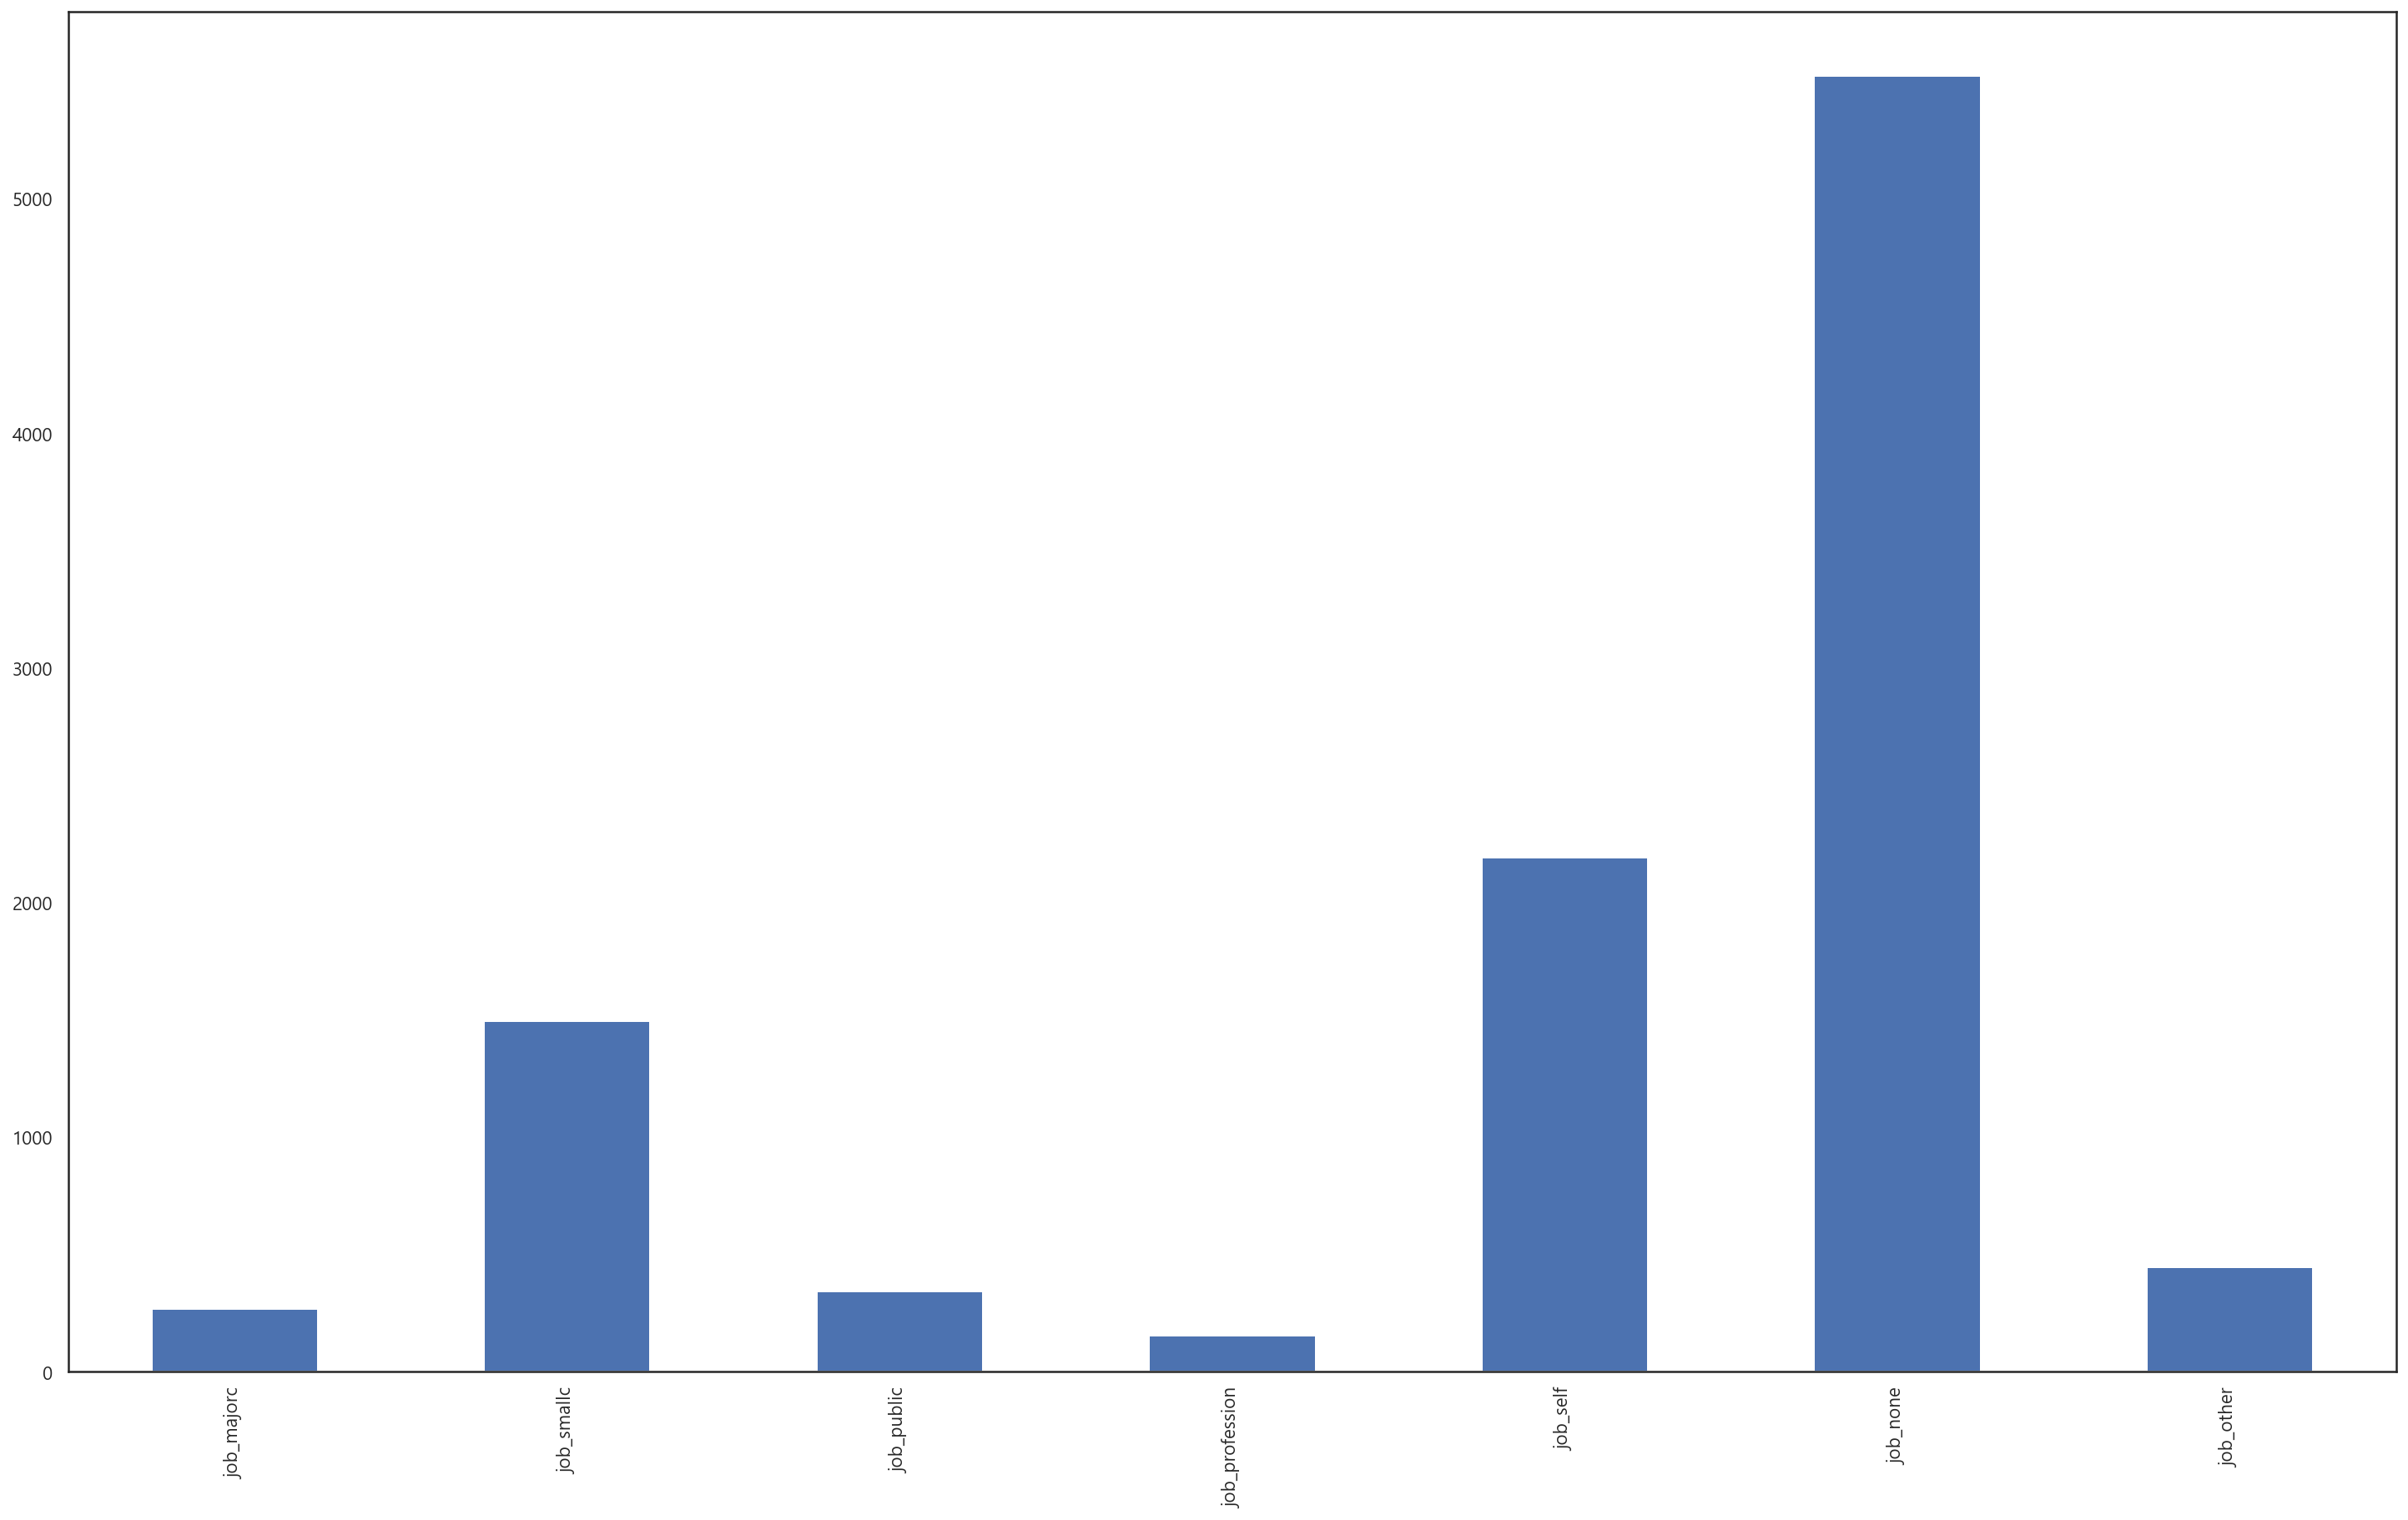

In [23]:
job_df.loc[0:].sum().plot.bar();

In [24]:
# 대기업/중소기업/공기업/전문직/자영업/무직/기타 순 비중
# 점수는 최대 100점
totalsum = job_df.iloc[0:].sum().sum()
a = [np.round(each/totalsum*100,2) for each in job_df.iloc[0:].sum()]
a

[2.57, 14.36, 3.28, 1.5, 21.03, 52.98, 4.28]

In [25]:
import plotly.express as px
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

In [26]:
# job_points의 4분위수 확인
# count    10422.000000
# mean        31.607145
# std         14.093122
# min          0.000000
# 25%         21.805000
# 50%         33.155000
# 75%         42.170000
# max         73.080000
fig = px.box(data['job_points'], y = 'job_points',width=400, height=500)
fig.show()

In [27]:
# 4분위수에 따라 4개 등급으로 분류
job_level = []
level = ['d', 'c', 'b', 'a']
q = [0.25, 0.5, 0.75, 1]

for i in range(0, len(data)):
    for index in range(0, 4):
        if data['job_points'].loc[i] <= data['job_points'].quantile(q[index]):
            job_level.append(level[index])
            break
job_level

['b',
 'c',
 'c',
 'a',
 'b',
 'd',
 'c',
 'a',
 'a',
 'a',
 'a',
 'b',
 'b',
 'c',
 'a',
 'a',
 'c',
 'b',
 'a',
 'd',
 'c',
 'b',
 'd',
 'a',
 'a',
 'c',
 'd',
 'b',
 'c',
 'b',
 'd',
 'a',
 'b',
 'a',
 'c',
 'a',
 'c',
 'a',
 'd',
 'a',
 'a',
 'b',
 'a',
 'a',
 'c',
 'a',
 'd',
 'a',
 'c',
 'b',
 'a',
 'd',
 'a',
 'b',
 'a',
 'd',
 'c',
 'a',
 'c',
 'b',
 'a',
 'b',
 'd',
 'c',
 'b',
 'd',
 'c',
 'c',
 'b',
 'a',
 'd',
 'd',
 'd',
 'd',
 'c',
 'b',
 'd',
 'a',
 'c',
 'b',
 'd',
 'c',
 'c',
 'a',
 'b',
 'b',
 'a',
 'a',
 'b',
 'a',
 'c',
 'b',
 'b',
 'b',
 'a',
 'c',
 'd',
 'b',
 'd',
 'b',
 'd',
 'b',
 'a',
 'b',
 'd',
 'd',
 'b',
 'c',
 'a',
 'b',
 'd',
 'a',
 'b',
 'a',
 'd',
 'c',
 'c',
 'a',
 'd',
 'b',
 'a',
 'd',
 'a',
 'd',
 'a',
 'c',
 'c',
 'c',
 'a',
 'b',
 'a',
 'c',
 'c',
 'b',
 'a',
 'c',
 'a',
 'a',
 'c',
 'd',
 'd',
 'b',
 'd',
 'b',
 'b',
 'a',
 'c',
 'b',
 'c',
 'd',
 'b',
 'a',
 'b',
 'a',
 'c',
 'a',
 'd',
 'd',
 'b',
 'a',
 'c',
 'd',
 'c',
 'b',
 'a',
 'd',
 'd'

In [28]:
len(job_level)

10422

In [29]:
# data 데이터 프레임에 job level 컬럼 추가
data['job_level'] = job_level
data[['job_level','job_points']].head()

job_level  job_points
0         b       12.02
1         c       10.58
2         c       10.34
3         a       16.61
4         b       12.50

In [30]:
# 피벗1: job_level에 따른 age, job_points, sex (zip_cd는 개수 확인용)
job_lv_pivot = pd.pivot_table(data,
                             index = ['job_level'],
                             values = ['job_points','age','sex','zip_cd'],
                              aggfunc={'job_points':'mean','age':'mean','sex':'mean','zip_cd':'median','zip_cd':'count'},
                             )
job_lv_pivot

age  job_points       sex  zip_cd
job_level                                         
a          46.096774   18.457969  1.158602    2604
b          49.685142   13.720096  1.528483    2598
c          56.841561    9.875277  1.657099    2613
d          62.408132    4.138569  1.625623    2607

In [31]:
job_lv_pivot['age']

job_level
a    46.096774
b    49.685142
c    56.841561
d    62.408132
Name: age, dtype: float64

In [32]:
# job_points과 age는 반비례
# job_points가 높을 수록 남성 비율이 높다
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.05, x_title='Job points')
fig.add_trace(go.Scatter(name='Age', x = job_lv_pivot['job_points'], y = job_lv_pivot['age']), row = 1, col =1)
fig.add_trace(go.Scatter(name='Sex\n(Male:1,Female:2)',x = job_lv_pivot['job_points'], y = job_lv_pivot['sex']), row = 2, col =1)
fig.update_layout(height=400, width=700, title_text="<Correlation between Job points and Age/Sex>")
fig.show()

In [35]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
level = ['a','b','c','d']
fig = make_subplots(rows=1, cols=3,
                    subplot_titles=("age", "job points", "sex"))
fig.add_trace(go.Scatter(x = job_lv_pivot['job_points'], y = job_lv_pivot['age']), row = 1, col =1)
fig.add_trace(go.Box(y = data['job_points']), row = 1, col =2)
fig.add_trace(go.Scatter(x = job_lv_pivot['job_points'], y = job_lv_pivot['sex']), row = 1, col =3)
fig.update_layout(height=400, width=600, title_text="<직업 레벨 간의 상관관계>")
fig.show()

In [36]:
# 피벗2 : job_level에 따른 직업군 비중
job_lv_pivot2 = pd.pivot_table(data,
                             index = ['job_level'],
                             values = ['job_majorc','job_smallc','job_public','job_profession','job_self','job_none','job_other'],
                             margins=True)
job_lv_pivot2

job_majorc  job_none  job_other  job_profession  job_public  \
job_level                                                                
a            0.052867  0.316179   0.063470        0.017251    0.075802   
b            0.030741  0.439556   0.059115        0.020734    0.035190   
c            0.015386  0.557768   0.037462        0.015181    0.015578   
d            0.003817  0.805184   0.011346        0.006809    0.004726   
All          0.025685  0.529827   0.042825        0.014988    0.032800   

           job_self  job_smallc  
job_level                        
a          0.215913    0.258518  
b          0.241503    0.173162  
c          0.255215    0.103409  
d          0.128609    0.039508  
All        0.210307    0.143568

In [37]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [38]:
job_lv_pivot2[:4]

job_majorc  job_none  job_other  job_profession  job_public  \
job_level                                                                
a            0.052867  0.316179   0.063470        0.017251    0.075802   
b            0.030741  0.439556   0.059115        0.020734    0.035190   
c            0.015386  0.557768   0.037462        0.015181    0.015578   
d            0.003817  0.805184   0.011346        0.006809    0.004726   

           job_self  job_smallc  
job_level                        
a          0.215913    0.258518  
b          0.241503    0.173162  
c          0.255215    0.103409  
d          0.128609    0.039508

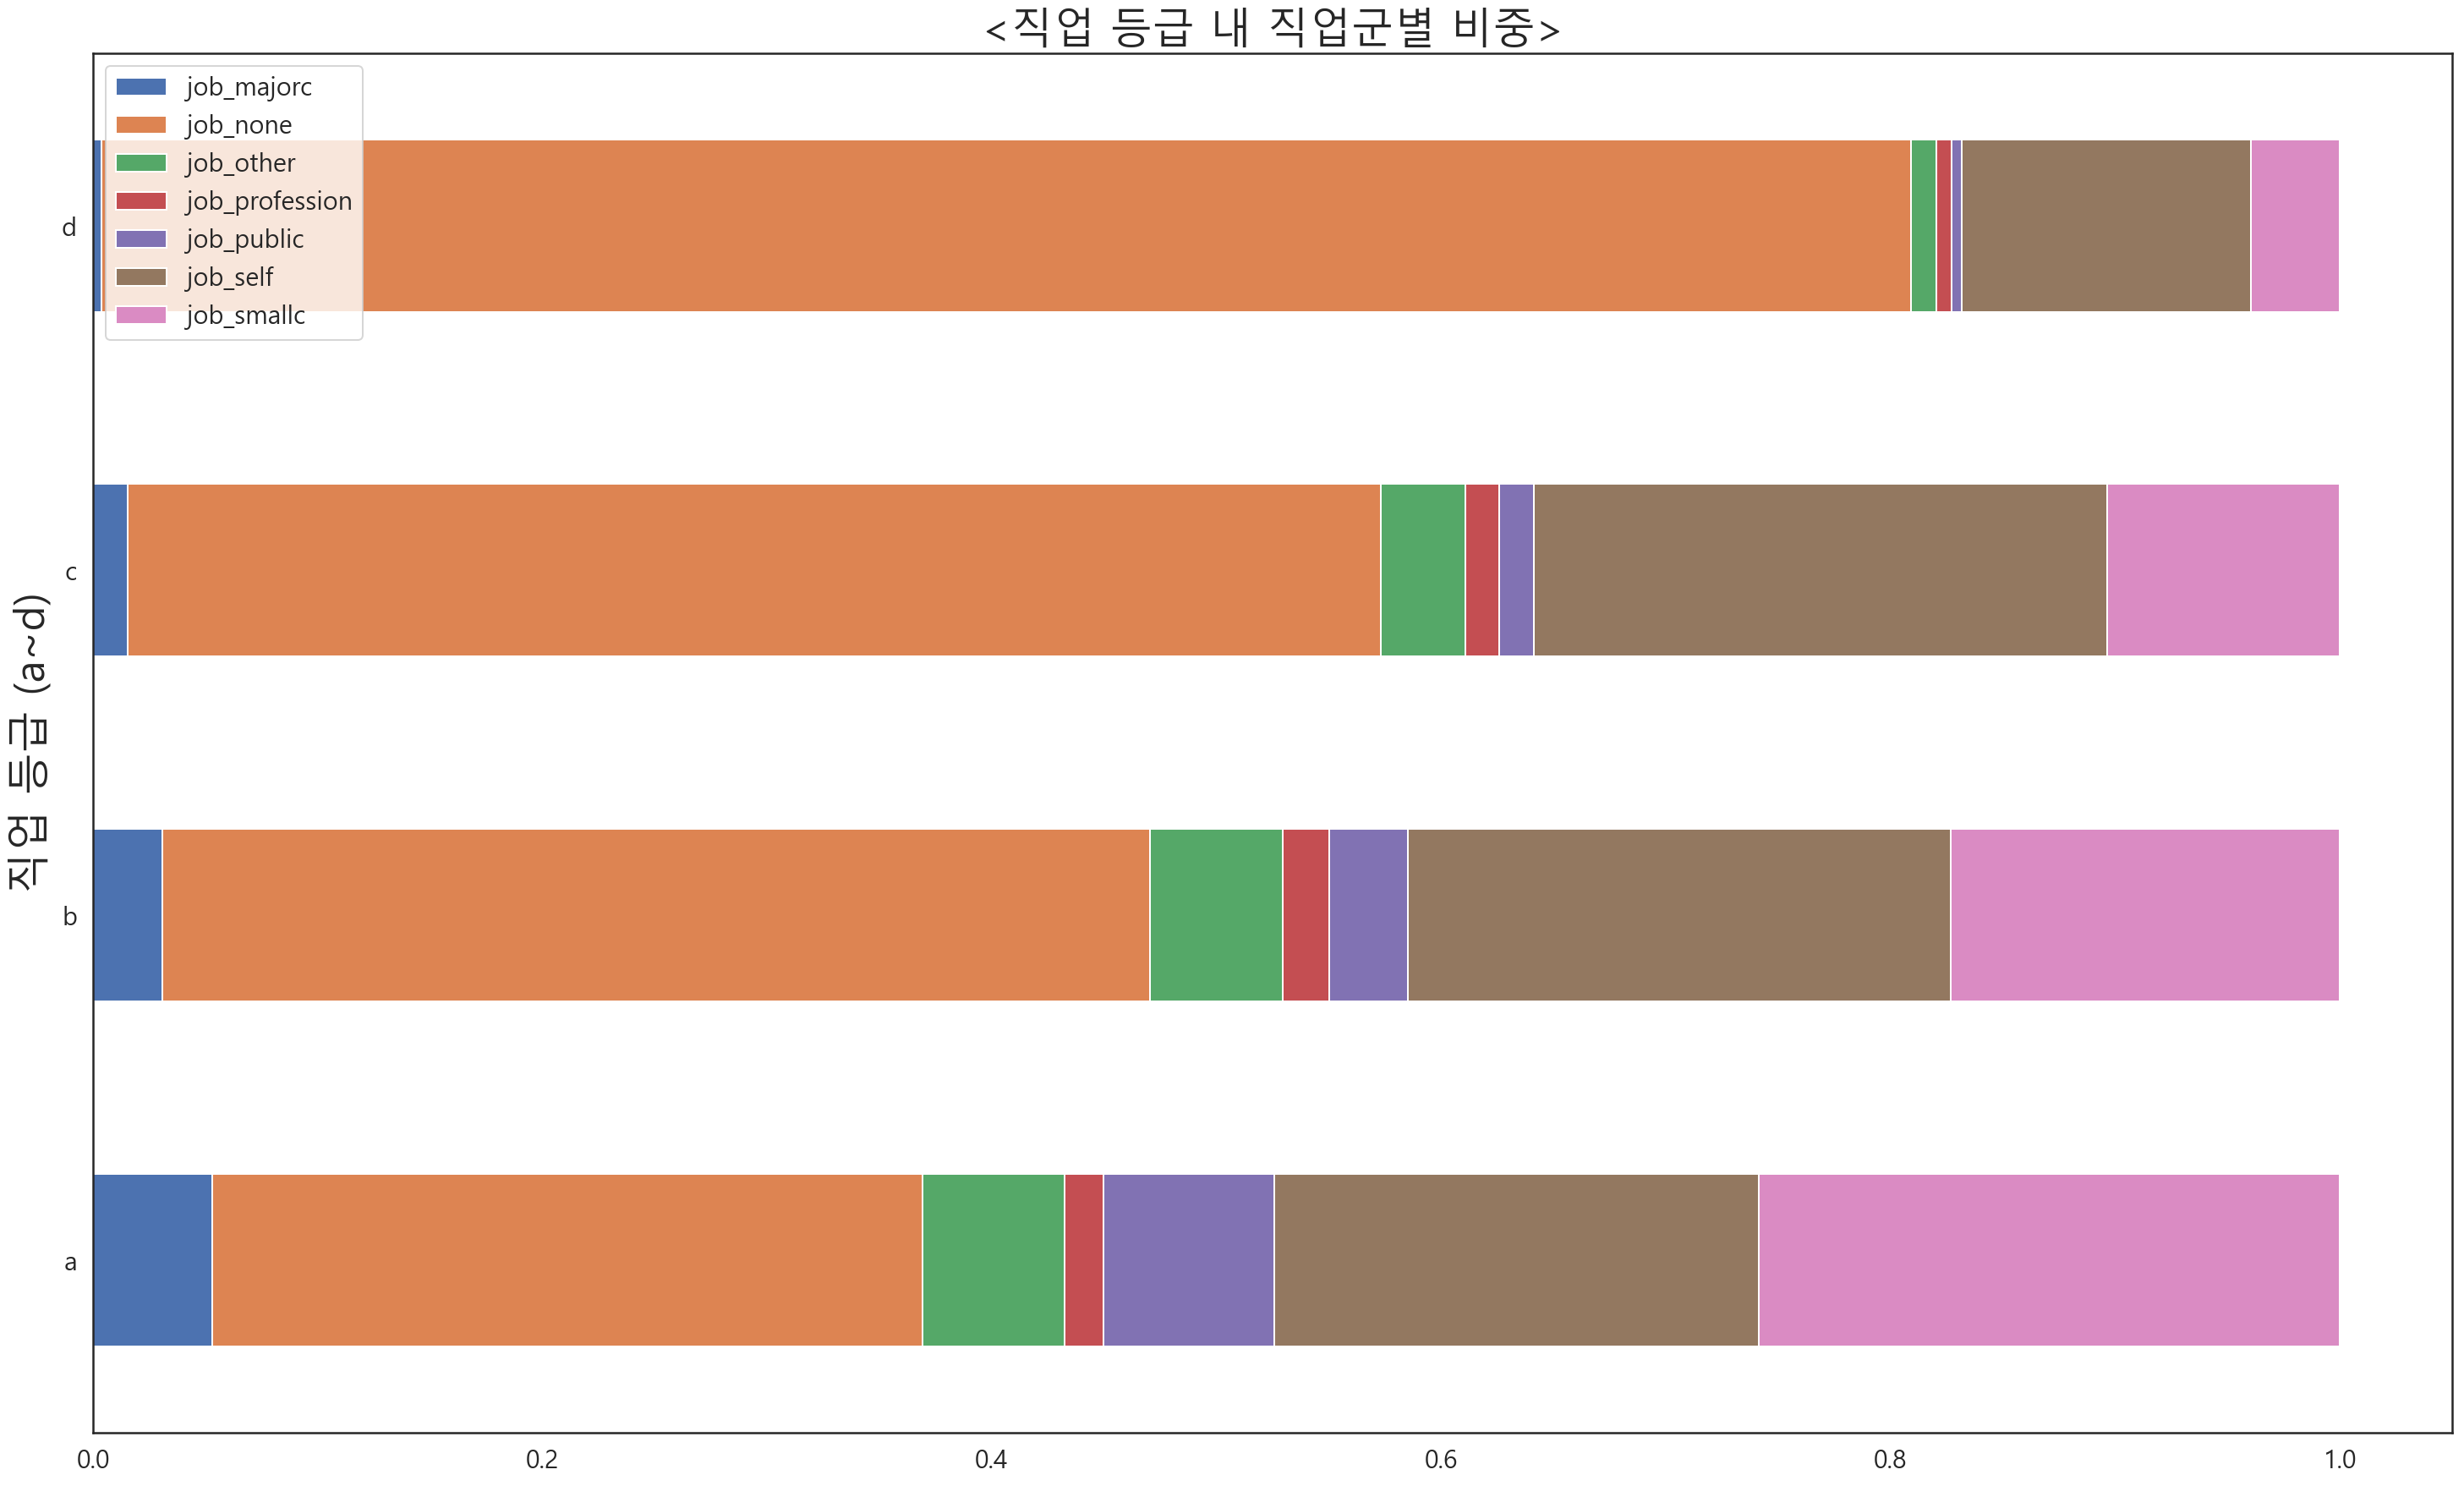

In [39]:
job_bar_fig = job_lv_pivot2[:4].plot.barh(stacked=True)
plt.title('<직업 등급 내 직업군별 비중>',fontsize=25)
plt.rcParams["figure.figsize"] = (25,15)
plt.ylabel('직업 등급 (a~d)',fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

★ bar chart 예쁘게 그리는 법 연구중..수정 예정

In [40]:
# job_level 별 산점도
# 모든 항목이 해안가를 둘러싸고 거주중
# 방법을 고민중인데..아마도 한라산(제주도 가운데)을 기점으로
# 해안가 지점까지의 직선 거리 변환을 해서 2d scatter를 그릴 수 있지 않을까?
px.scatter_3d(data, x = "x_axis", y = "y_axis", z= 'job_points', size='job_points', color='job_level', size_max = 10)

In [41]:
# 등급별 지도에 표시
scatter_a = px.scatter(data[data['job_level']=='a'], x = "x_axis", y = "y_axis", size='job_points', size_max = 10)
scatter_a.show()

★ 평면도 scatter 4개를 subplots로 할 수는 없을까요..?
<!-- fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0] = plt.scatter3d(x = "x_axis", y = "y_axis", s='job_points')
ax[1] = scatter_b -->

In [42]:
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'type': 'ternary'}, {'type': 'ternary'}],
           [{'type': 'ternary'}, {'type': 'ternary'}]])
fig.add_trace(go.Scatter3d(x = data["x_axis"], y = data["y_axis"], z=data[data['job_level']=='a'], row=1,col=1)
fig.add_trace(go.Scatter3d(x = data["x_axis"], y = data["y_axis"], z=data[data['job_level']=='b'], row=1,col=2)
fig.add_trace(go.Scatter3d(x = data["x_axis"], y = data["y_axis"], z=data[data['job_level']=='c'], row=2,col=1)
fig.add_trace(go.Scatter3d(x = data["x_axis"], y = data["y_axis"], z=data[data['job_level']=='d'], row=2,col=2)
fig.show()

SyntaxError: invalid syntax (<ipython-input-42-a0e929134e93>, line 6)

In [43]:
scatter_b = px.scatter(data[data['job_level']=='b'], x = "x_axis", y = "y_axis", size='job_points', size_max = 10)
scatter_b.show()

In [44]:
scatter_c = px.scatter(data[data['job_level']=='c'], x = "x_axis", y = "y_axis", size='job_points', size_max = 10)
scatter_c.show()

In [45]:
scatter_d = px.scatter(data[data['job_level']=='d'], x = "x_axis", y = "y_axis", size='job_points', size_max = 10)
scatter_d.show()

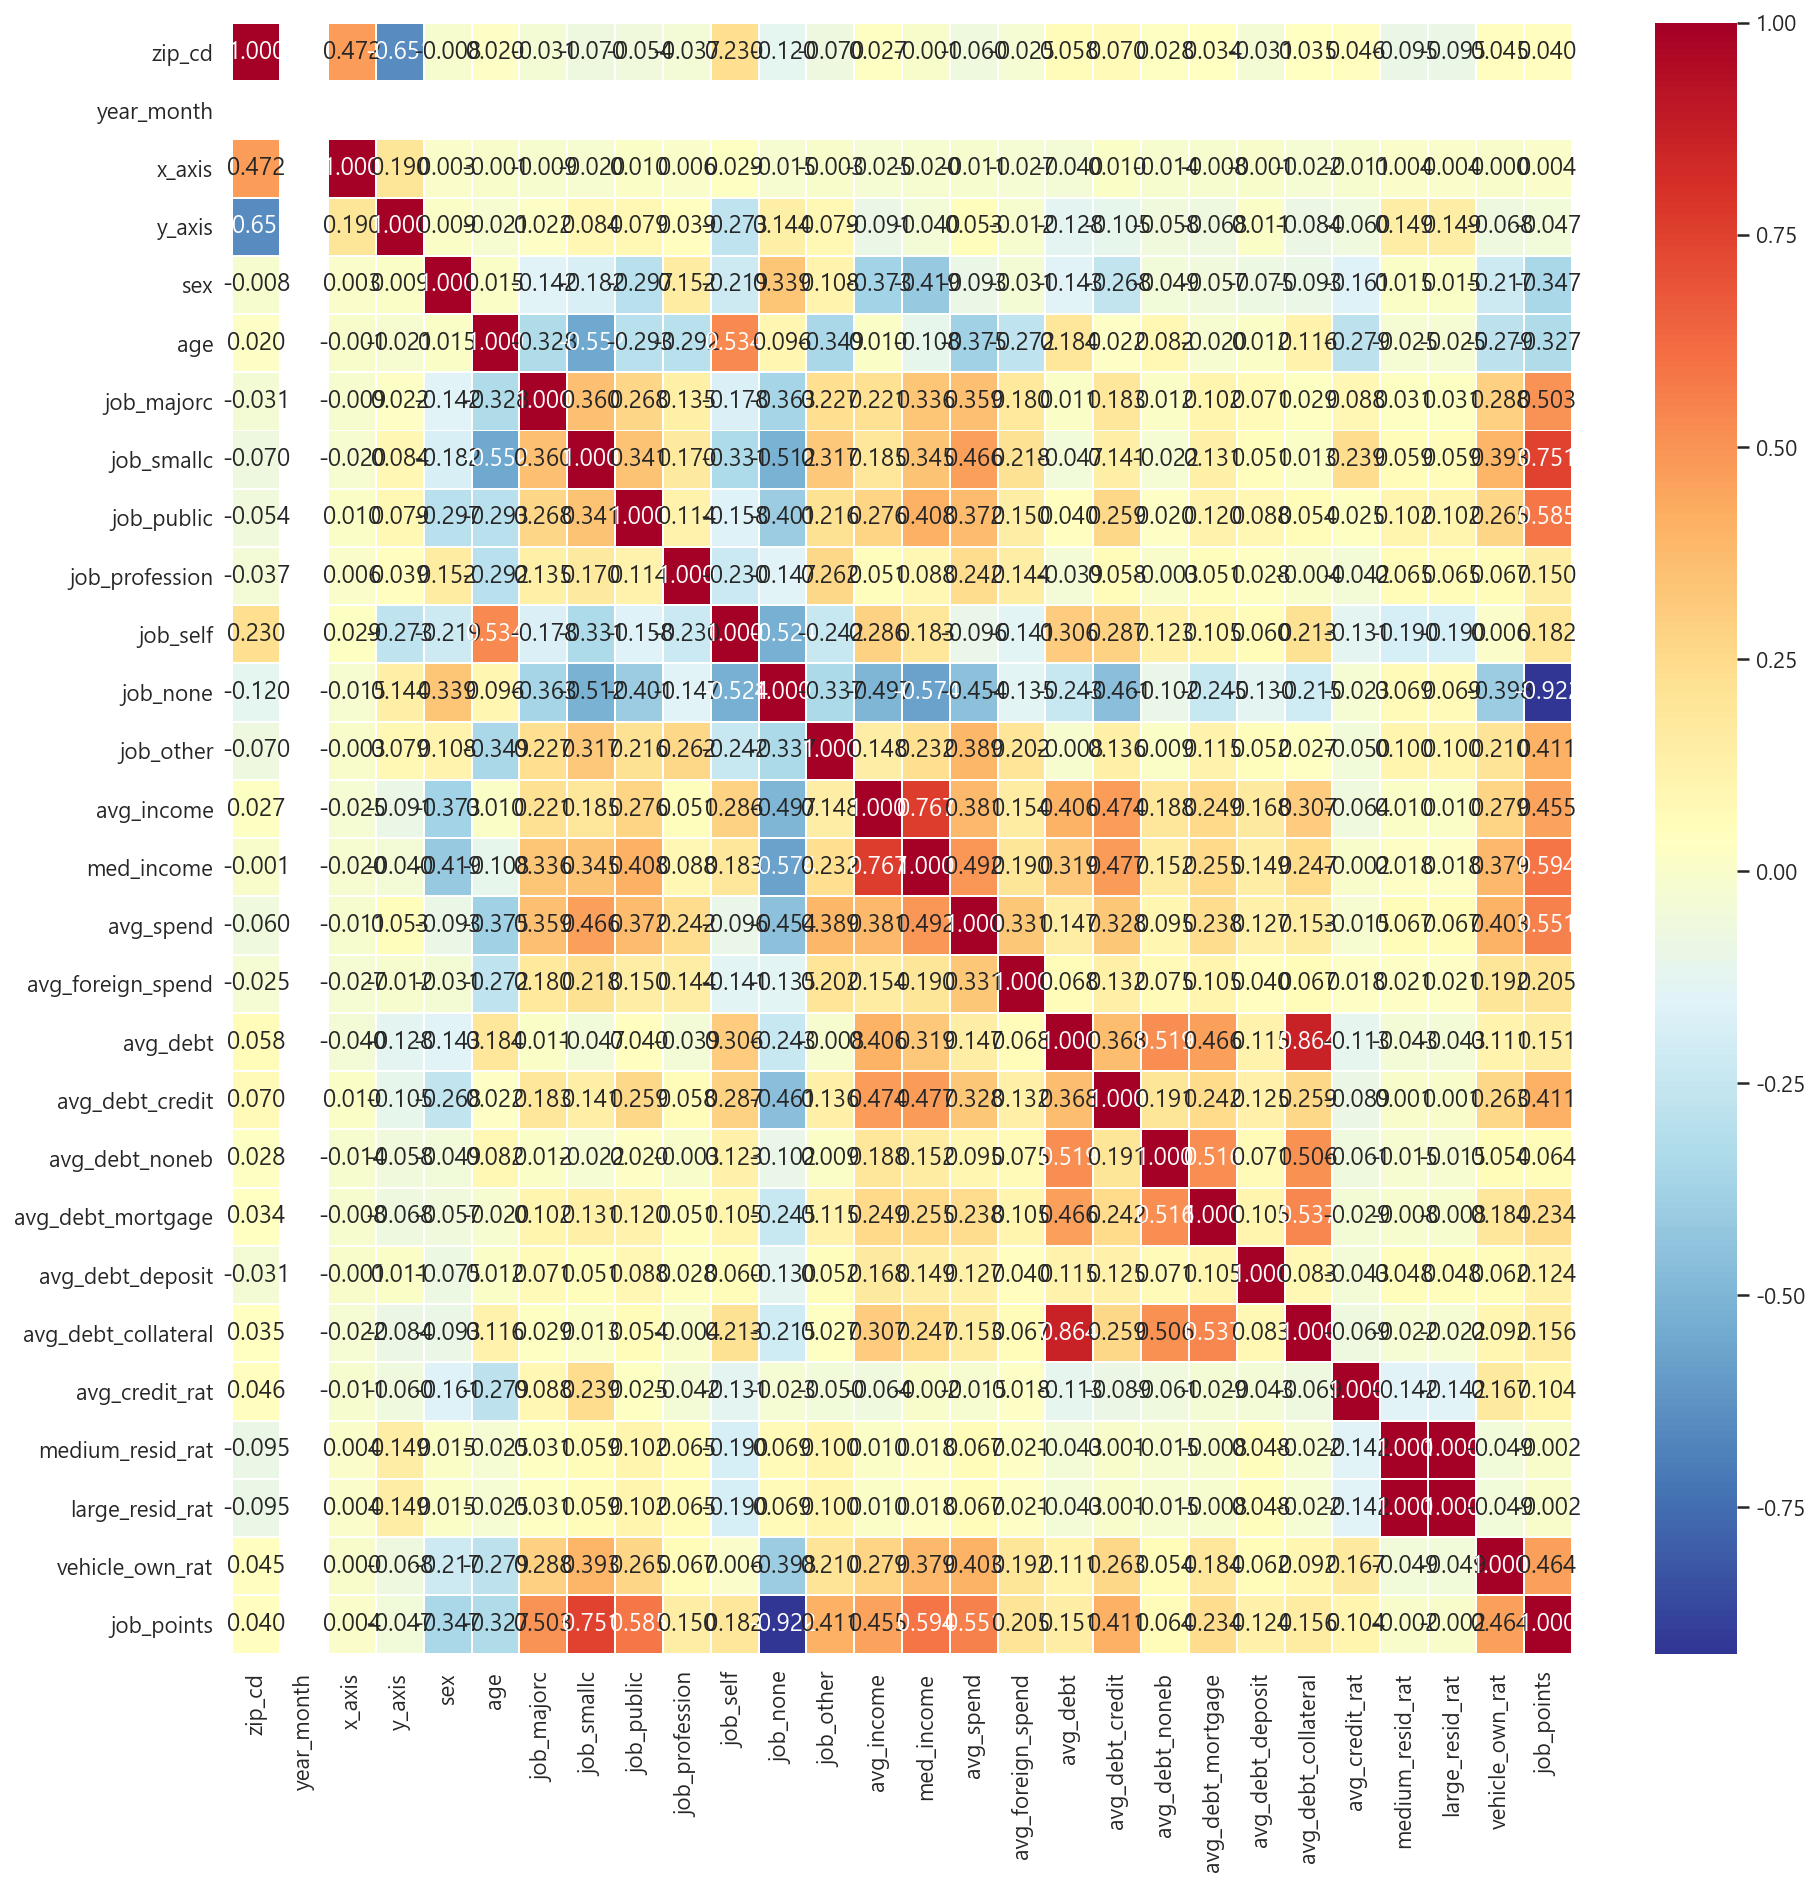

In [48]:
plt.figure(figsize=(15,15))
a = sns.heatmap(data.corr(), annot = True, fmt ='.3f', linewidths=0.5, cmap='RdYlBu_r')